# Autour du SARS-CoV-2 (Covid-19)

Import des packages nécessaires à l'exécution du code

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import os
import urllib.request
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime as dt

#Pour afficher le code sur toute la largeur de la fenêtre
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Import des données
Si le fichier local *covid_series.csv* n'existe pas dans le répertoire, alors il est téléchargé à partir de l'url *data_url* dans *raw_data*. D'ailleurs, j'ai transposé le tableau *raw_data* pour qu'il soit plus facilement lisible. 


In [2]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data_file = "covid_series.csv"

if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

raw_data = pd.read_csv(data_url, skiprows=0)
raw_data

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
250                                           NaN                    Togo   
251                                           NaN                   Tonga   
252                                           NaN     Trinidad and Tobago   
253                                           NaN                 Tunisia   
254                                           NaN                  Turkey   
255                                           NaN                      US   
256                                           NaN                  Uganda   
257                                           NaN                 Ukraine   
258                                           NaN    United Arab Emirates   
259                                      Anguilla          United Kingdom   
260                                       Bermuda          United Kingdom   
261                        British Virgin Islands          United Kingdom   
262                                Cayman Islands          United Kingdom   
263                               Channel Islands          United Kingdom   
264                   Falkland Islands (Malvinas)          United Kingdom   
265                                     Gibraltar          United Kingdom   
266                                   Isle of Man          United Kingdom   
267                                    Montserrat          United Kingdom   
268  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
269                      Turks and Caicos Islands          United Kingdom   
270                            

## Traitement des données et représentations graphique
On remarque que les 4 premières colonnes de *raw_data* peuvent être considérées comme des métadonnées et seront retirées du DataFrame par la suite ou placées en index. On fera attention de bien conserver le pays + la région dans les index des colonnes pour éviter les doublons. 

*Note : j'ai remplacé les np.nan par des chaînes de caractères vides et j'ai transposé le tableau pour traiter les données comme j'ai l'habitude*

In [50]:
states = pd.Series(raw_data['Province/State']).replace(np.nan,'') 
countries = pd.Series(raw_data['Country/Region'])
columns_names = states + ' ' + countries
data = raw_data.transpose()[4:]
data = data.rename(columns = columns_names)
data = data.reset_index()
data.rename(columns={'index': 'Date'}, inplace=True)

Maintenant, on va modifier le format des dates pour qu'elles soient lisibles par pandas

In [51]:
def convert_dates(ch):
    liste = ch.split('/')
    if len(liste[0])<2:
        liste[0] = '0' + liste[0]
    if len(liste[1])<2:
        liste[1] = '0' + liste[1]
   
    return "{}-{}-20{}".format(liste[1],liste[0],liste[2])

Et on applique cette formule à notre dataframe

In [52]:
data['Date'] = [convert_dates(mdy) for mdy in data['Date']]
data['Date'] = [dt.strptime(dstr,'%d-%m-%Y') for dstr in data['Date']]
data = data.set_index('Date')

Notre DataFrame est bien rangé et indexé, on va donc plotter les données de contaminations Covid-19 au cours du temps pour chaque pays.

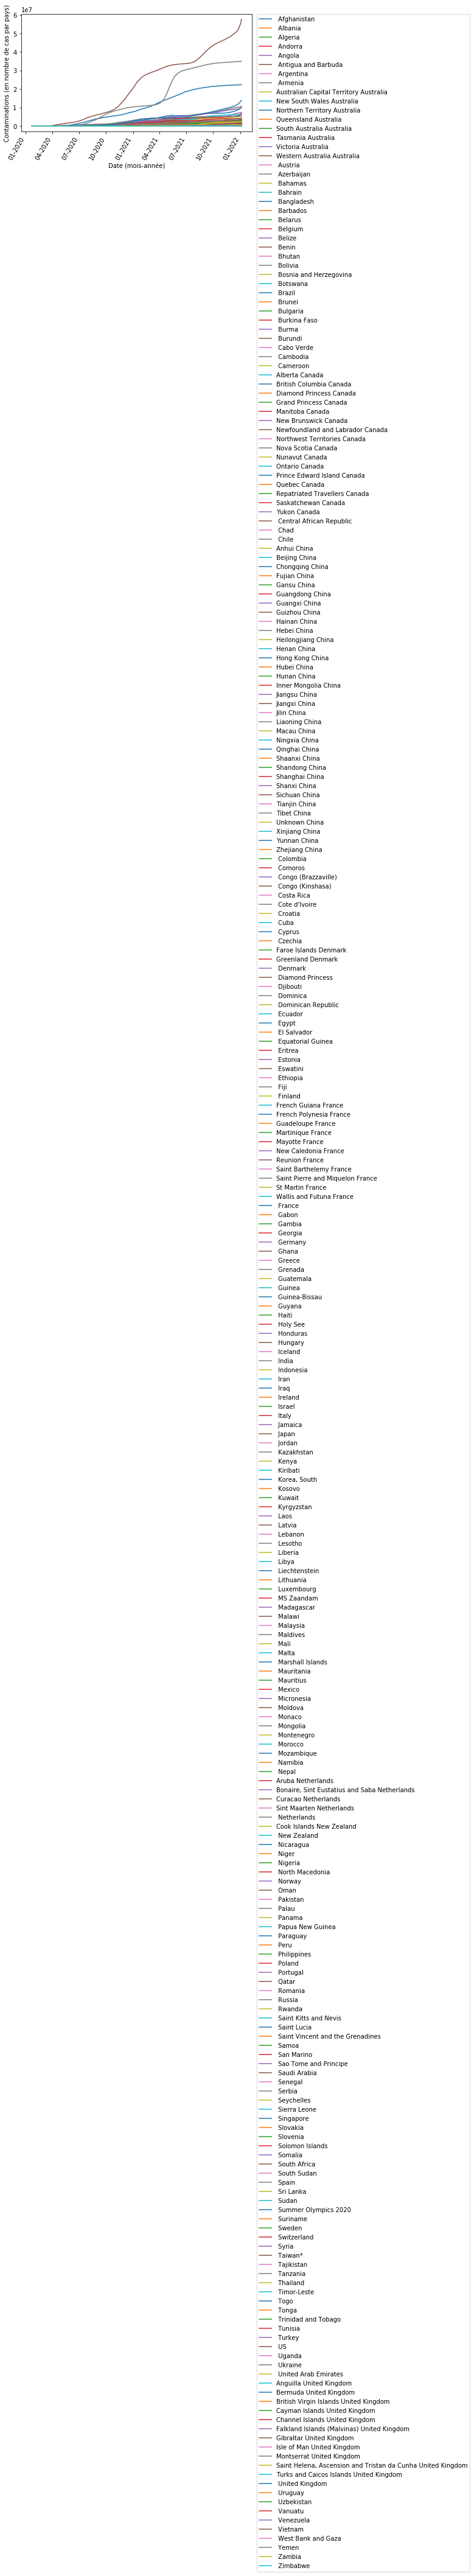

In [58]:
plt.plot(data.index,data)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y"))
plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
plt.ylabel('Contaminations (en nombre de cas par pays)')
plt.xlabel('Date (mois-année)')
plt.tight_layout()
plt.legend(data.columns,bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

Comme il y a trop d'information dans le graph précédent, on va créer une nouvelle colonne dans *data* qui compte le nombre de cas par jour dans le monde entier.

In [61]:
data['World'] = data.sum(axis=1)

Et maintenant, on a une seule courbe : 

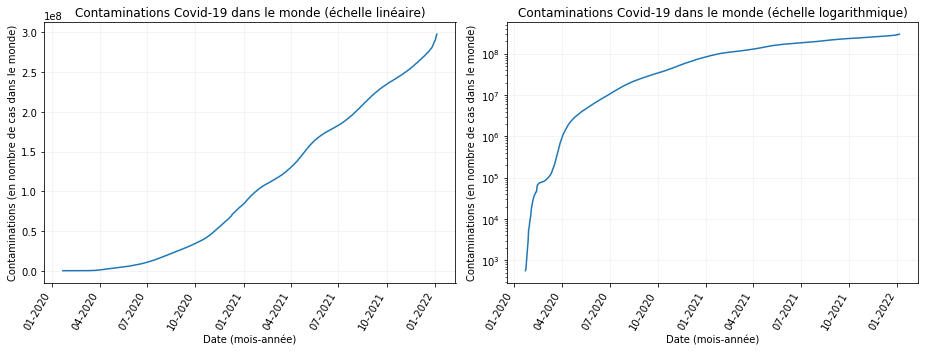

In [74]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
plt.plot(data.index,data['World'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y"))
plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
plt.ylabel('Contaminations (en nombre de cas dans le monde)')
plt.xlabel('Date (mois-année)')
plt.tight_layout()
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
plt.title('Contaminations Covid-19 dans le monde (échelle linéaire)')

plt.subplot(1,2,2)
plt.plot(data.index,data['World'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y"))
plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
plt.ylabel('Contaminations (en nombre de cas dans le monde)')
plt.xlabel('Date (mois-année)')
plt.tight_layout()
plt.yscale('log')
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
plt.title('Contaminations Covid-19 dans le monde (échelle logarithmique)')

plt.show()


Compte tenue des échelles, il peut également être intéressant de regarder ces données avec une échelle log en y.

## Question subsidiaire à faire quand on sera sorti du « merdier »
*En janvier 2022, époque à laquelle je fais cet exercice, la pandémie n'est toujours pas terminée mais bon, je suis coincée à la maison alors bon, autant finir l'exo..*

**Attention : les données que je vais regarder sont celles qui sont disponibles aujourd'hui, et on est loin de la fin de la pandémie alors l'interpretation n'est pas rigoureuse !**

### Import des données

In [75]:
data_url2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
data_file2 = "covid_deces_series.csv"

if not os.path.exists(data_file2):
    urllib.request.urlretrieve(data_url2, data_file2)

raw_dead_data = pd.read_csv(data_url2, skiprows=0)
raw_dead_data

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
250                                           NaN                    Togo   
251                                           NaN                   Tonga   
252                                           NaN     Trinidad and Tobago   
253                                           NaN                 Tunisia   
254                                           NaN                  Turkey   
255                                           NaN                      US   
256                                           NaN                  Uganda   
257                                           NaN                 Ukraine   
258                                           NaN    United Arab Emirates   
259                                      Anguilla          United Kingdom   
260                                       Bermuda          United Kingdom   
261                        British Virgin Islands          United Kingdom   
262                                Cayman Islands          United Kingdom   
263                               Channel Islands          United Kingdom   
264                   Falkland Islands (Malvinas)          United Kingdom   
265                                     Gibraltar          United Kingdom   
266                                   Isle of Man          United Kingdom   
267                                    Montserrat          United Kingdom   
268  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
269                      Turks and Caicos Islands          United Kingdom   
270                            

Les données ont la même structure que celles des contaminations, on peut donc ranger le df de la même manière.
### Traitement des données de décès

In [101]:
dead_data = raw_dead_data.transpose()[4:]
dead_data = dead_data.rename(columns = columns_names)
dead_data = dead_data.reset_index()
dead_data.rename(columns={'index': 'Date'}, inplace=True)
dead_data['Date'] = [convert_dates(mdy) for mdy in dead_data['Date']]
dead_data['Date'] = [dt.strptime(dstr,'%d-%m-%Y') for dstr in dead_data['Date']]
dead_data = dead_data.set_index('Date')
dead_data['World'] = dead_data.sum(axis=1)

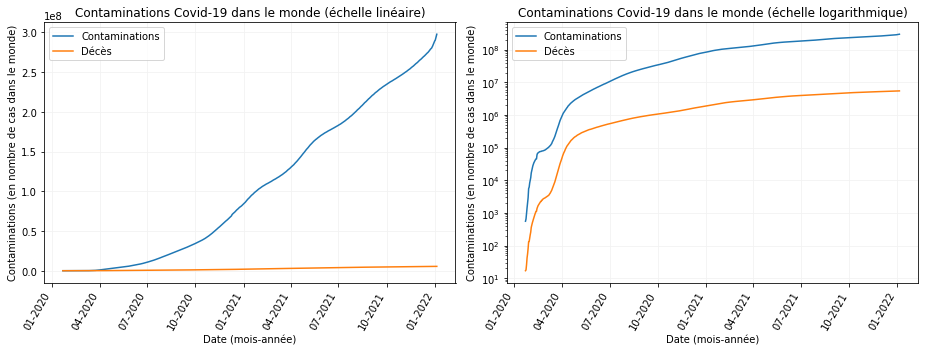

In [104]:
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
plt.plot(data.index,data['World'])
plt.plot(dead_data.index,dead_data['World'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y"))
plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
plt.ylabel('Contaminations (en nombre de cas dans le monde)')
plt.xlabel('Date (mois-année)')
plt.tight_layout()
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
plt.legend(['Contaminations','Décès'])
plt.title('Contaminations Covid-19 dans le monde (échelle linéaire)')

plt.subplot(1,2,2)
plt.plot(data.index,data['World'])
plt.plot(dead_data.index,dead_data['World'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y"))
plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
plt.ylabel('Contaminations (en nombre de cas dans le monde)')
plt.xlabel('Date (mois-année)')
plt.tight_layout()
plt.yscale('log')
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
plt.legend(['Contaminations','Décès'])
plt.title('Contaminations Covid-19 dans le monde (échelle logarithmique)')

plt.show()


En regardant les courbes en échelle logarithmique, je me suis fait la remarque que l'écart entre les courbes de contamination et de décès semble augmenter avec le temps. On va regarder ça dans le graphe suivant : 

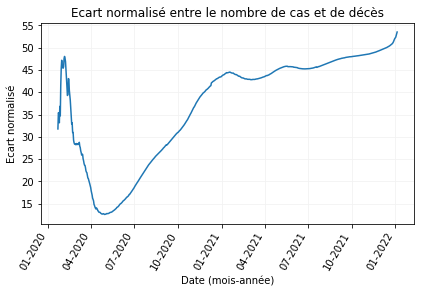

In [119]:
ecart = pd.DataFrame((data['World'] - dead_data['World'])/dead_data['World'])

plt.plot(ecart.index,ecart['World'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y"))
plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
plt.ylabel('Ecart normalisé')
plt.xlabel('Date (mois-année)')
plt.tight_layout()
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
plt.title('Ecart normalisé entre le nombre de cas et de décès')

plt.show()

Les "bosses" sur la courbe pourraient correspondre aux apparatitions des différents variants. Sur [Santé Publique France](https://www.santepubliquefrance.fr/dossiers/coronavirus-covid-19/coronavirus-circulation-des-variants-du-sars-cov-2#block-331392), on trouve la liste des variants préoccupants au 01/12/2021, la date de leur dernière détection en France (Sauf Delta et Omicron qui circulent beaucoup ces jours)

In [121]:
noms=['Alpha','Beta','Gamma','Delta','Omicron']
date=['29-10-2021','17-08-2021','14-09-2021','06-01-2022','06-01-2022']

TypeError: text() missing 1 required positional argument: 's'

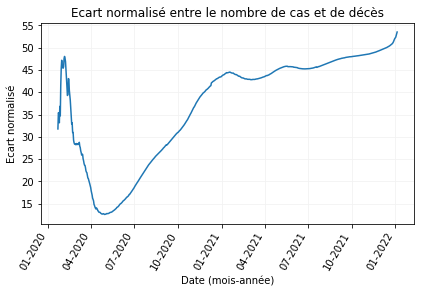

In [123]:
plt.plot(ecart.index,ecart['World'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y"))
plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
plt.ylabel('Ecart normalisé')
plt.xlabel('Date (mois-année)')
plt.tight_layout()
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
plt.title('Ecart normalisé entre le nombre de cas et de décès')

plt.text(noms,date)

plt.show()